In [2]:
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="darkgrid", color_codes=True)

In [46]:
data = pd.read_csv('train_V2.csv', nrows=1000)
# test = pd.read_csv('test_V2.csv')

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_duo,matchType_normal-duo,matchType_normal-solo,matchType_normal-squad,matchType_solo,matchType_squad
0,0,0,51.46,0,0,0,73,0,0,0,...,0,588.00,1,0,False,False,False,False,False,False
1,0,4,179.10,0,0,2,11,0,2,1,...,0,2017.00,6,0,False,False,False,False,False,False
2,1,0,23.40,0,0,4,49,0,0,0,...,0,787.80,4,0,False,False,False,False,False,False
3,0,0,65.52,0,0,0,54,0,0,0,...,0,1812.00,3,0,False,False,False,False,False,False
4,0,4,330.20,1,2,1,7,0,3,1,...,0,2963.00,4,0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,1,2,381.00,3,0,7,4,1294,4,2,...,0,1799.00,5,1526,False,False,False,False,False,False
1934170,0,0,0.00,0,0,0,64,1449,0,0,...,0,1195.00,3,1496,False,False,False,False,False,False
1934171,0,0,91.96,0,0,3,24,0,1,1,...,0,3327.00,3,0,False,False,False,False,False,False
1934172,1,2,138.60,0,0,12,25,0,1,1,...,0,1893.00,4,0,False,False,False,False,False,False


In [40]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [41]:
data.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

# Делаю шедеверо кодирование


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2,random_state=42)

In [95]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred = model.predict(X_test)

In [93]:
y_pred

array([0.51807105, 0.92133836, 0.97700061, ..., 0.2151648 , 0.35684705,
       0.83974792])

In [97]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae.round(15)

0.092175335109909

In [98]:
test.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'matchType_duo', 'matchType_normal-duo', 'matchType_normal-solo',
       'matchType_normal-squad', 'matchType_solo', 'matchType_squad'],
      dtype='object')

In [111]:
test

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_duo,matchType_normal-duo,matchType_normal-solo,matchType_normal-squad,matchType_solo,matchType_squad
0,0,0,51.46,0,0,0,73,0,0,0,...,0,588.00,1,0,False,False,False,False,False,False
1,0,4,179.10,0,0,2,11,0,2,1,...,0,2017.00,6,0,False,False,False,False,False,False
2,1,0,23.40,0,0,4,49,0,0,0,...,0,787.80,4,0,False,False,False,False,False,False
3,0,0,65.52,0,0,0,54,0,0,0,...,0,1812.00,3,0,False,False,False,False,False,False
4,0,4,330.20,1,2,1,7,0,3,1,...,0,2963.00,4,0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,1,2,381.00,3,0,7,4,1294,4,2,...,0,1799.00,5,1526,False,False,False,False,False,False
1934170,0,0,0.00,0,0,0,64,1449,0,0,...,0,1195.00,3,1496,False,False,False,False,False,False
1934171,0,0,91.96,0,0,3,24,0,1,1,...,0,3327.00,3,0,False,False,False,False,False,False
1934172,1,2,138.60,0,0,12,25,0,1,1,...,0,1893.00,4,0,False,False,False,False,False,False


In [99]:
y_test_pred = model.predict(test)

In [101]:
y_test_pred

array([0.19645525, 0.8968265 , 0.45022394, ..., 0.80857218, 0.74079193,
       0.02859456])

In [105]:
res = pd.read_csv('sample_submission_V2.csv', index_col=0)

In [106]:
res

,winPlacePerc
Id,
9329eb41e215eb,1
639bd0dcd7bda8,1
63d5c8ef8dfe91,1
cf5b81422591d1,1
ee6a295187ba21,1
...,...
a316c3a13887d5,1
5312146b27d875,1
fc8818b5b32ad3,1


In [107]:
res['winPlacePerc'] = y_test_pred

In [108]:
res

,winPlacePerc
Id,
9329eb41e215eb,0.196455
639bd0dcd7bda8,0.896826
63d5c8ef8dfe91,0.450224
cf5b81422591d1,0.511931
ee6a295187ba21,0.952877
...,...
a316c3a13887d5,0.673318
5312146b27d875,0.422600
fc8818b5b32ad3,0.808572


In [109]:
res.to_csv('sample_submission_V2.csv')

In [1]:
df = pd.DataFrame({'assists': data['assists'], 'kills': data['kills']})
df_names = df[['assists', 'kills']]



sns.pairplot(data, hue='target')

NameError: name 'pd' is not defined

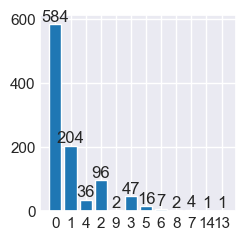

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

list_1 = data['kills']
c2 = Counter(list_1)
fig, ax = plt.subplots()
x = list(range(len(c2)))

patches = ax.bar(data = c2, x = x, height=c2.values())
ax.bar_label(patches)
ax.set_xticks(x)
ax.set_xticklabels(c2.keys())
plt.show()

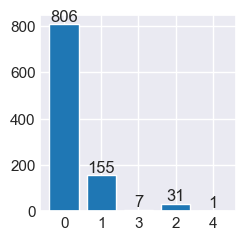

In [13]:
list_1 = data['assists']
c2 = Counter(list_1)
fig, ax = plt.subplots()
x = list(range(len(c2)))

patches = ax.bar(data = c2, x = x, height=c2.values())
ax.bar_label(patches)
ax.set_xticks(x)
ax.set_xticklabels(c2.keys())
plt.show()

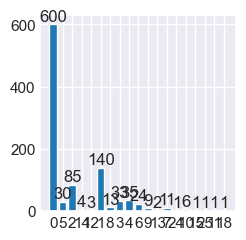

In [14]:
list_1 = data['heals']
c2 = Counter(list_1)
fig, ax = plt.subplots()
x = list(range(len(c2)))

patches = ax.bar(data = c2, x = x, height=c2.values())
ax.bar_label(patches)
ax.set_xticks(x)
ax.set_xticklabels(c2.keys())
plt.show()

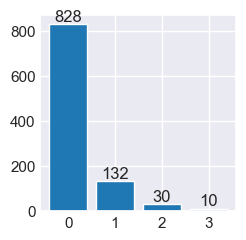

In [15]:
list_1 = data['headshotKills']
c2 = Counter(list_1)
fig, ax = plt.subplots()
x = list(range(len(c2)))

patches = ax.bar(data = c2, x = x, height=c2.values())
ax.bar_label(patches)
ax.set_xticks(x)
ax.set_xticklabels(c2.keys())
plt.show()

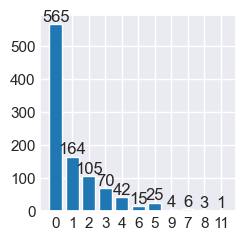

In [16]:
list_1 = data['boosts']
c2 = Counter(list_1)
fig, ax = plt.subplots()
x = list(range(len(c2)))

patches = ax.bar(data = c2, x = x, height=c2.values())
ax.bar_label(patches)
ax.set_xticks(x)
ax.set_xticklabels(c2.keys())
plt.show()

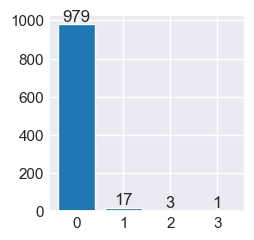

In [17]:
list_1 = data['teamKills']
c2 = Counter(list_1)
fig, ax = plt.subplots()
x = list(range(len(c2)))

patches = ax.bar(data = c2, x = x, height=c2.values())
ax.bar_label(patches)
ax.set_xticks(x)
ax.set_xticklabels(c2.keys())
plt.show()

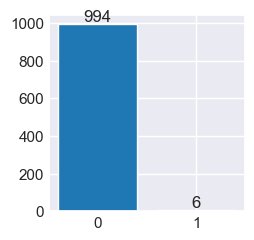

In [18]:
list_1 = data['roadKills']
c2 = Counter(list_1)
fig, ax = plt.subplots()
x = list(range(len(c2)))

patches = ax.bar(data = c2, x = x, height=c2.values())
ax.bar_label(patches)
ax.set_xticks(x)
ax.set_xticklabels(c2.keys())
plt.show()

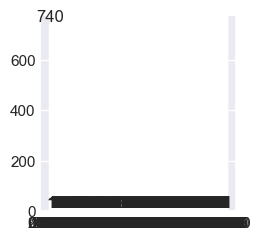

In [20]:
list_1 = data['rideDistance']
c2 = Counter(list_1)
fig, ax = plt.subplots()
x = list(range(len(c2)))

patches = ax.bar(data = c2, x = x, height=c2.values())
ax.bar_label(patches)
ax.set_xticks(x)
ax.set_xticklabels(c2.keys())
plt.show()

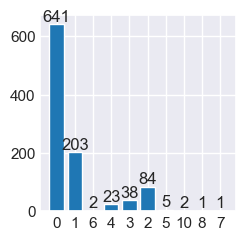

In [21]:
list_1 = data['DBNOs']
c2 = Counter(list_1)
fig, ax = plt.subplots()
x = list(range(len(c2)))

patches = ax.bar(data = c2, x = x, height=c2.values())
ax.bar_label(patches)
ax.set_xticks(x)
ax.set_xticklabels(c2.keys())
plt.show()

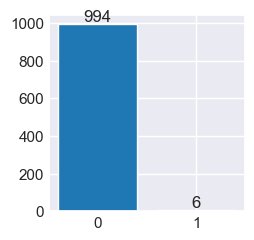

In [22]:
list_1 = data['vehicleDestroys']
c2 = Counter(list_1)
fig, ax = plt.subplots()
x = list(range(len(c2)))

patches = ax.bar(data = c2, x = x, height=c2.values())
ax.bar_label(patches)
ax.set_xticks(x)
ax.set_xticklabels(c2.keys())
plt.show()

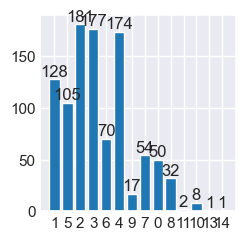

In [25]:
list_1 = data['weaponsAcquired']
c2 = Counter(list_1)
fig, ax = plt.subplots()
x = list(range(len(c2)))

patches = ax.bar(data = c2, x = x, height=c2.values())
ax.bar_label(patches)
ax.set_xticks(x)
ax.set_xticklabels(c2.keys())
plt.show()

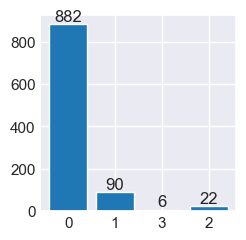

In [26]:
list_1 = data['revives']
c2 = Counter(list_1)
fig, ax = plt.subplots()
x = list(range(len(c2)))

patches = ax.bar(data = c2, x = x, height=c2.values())
ax.bar_label(patches)
ax.set_xticks(x)
ax.set_xticklabels(c2.keys())
plt.show()

In [44]:
data = data.drop(['revives', 'vehicleDestroys', 'roadKills', 'teamKills'], axis=1).head()

In [45]:
data.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,matchType,maxPlace,numGroups,rankPoints,rideDistance,swimDistance,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,squad-fpp,28,26,-1,0.0000,0.00,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,squad-fpp,26,25,1484,0.0045,11.04,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,duo,50,47,1491,0.0000,0.00,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,squad-fpp,31,30,1408,0.0000,0.00,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,solo-fpp,97,95,1560,0.0000,0.00,49.75,2,0,0.1875


In [7]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [ ]:
olumn_name = ['solo', 'duo', 'squad', 'solo-fpp', 'duo-fpp',  'squad-fpp']

data = pd.get_dummies(data, columns=['matchType'])

In [ ]:
data.drop(columns=['matchType_crashfpp', 'matchType_crashtpp',  'matchType_duo-fpp', 'matchType_flarefpp',
       'matchType_flaretpp', 'matchType_normal-duo-fpp', 'matchType_normal-solo-fpp', 'matchType_normal-squad-fpp', 
       'matchType_solo-fpp', 'matchType_squad-fpp'], axis=1, inplace=True)

In [ ]:
data.drop(columns=['Id', 'groupId', 'matchId'], axis=1, inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop(columns = ['winPlacePerc'])

In [ ]:
X = data.drop(columns = ['winPlacePerc'])
y = data['winPlacePerc']